In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import os

import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# Set random seed for reproducibility
np.random.seed(42)

import sys
sys.path.append('..')  
from src.dummy_data import DataGenerator
from src.merging.merge_causal_graph import CausalGraph

import pprint
import json

/opt/homebrew/Caskroom/miniconda/base/envs/graph_merging/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
def visualize_relationship_graph(graph_data, title):
    G = nx.DiGraph()

    for src, targets in graph_data.items():
        for tgt, relation in targets.items():
            if relation["isChild"]:
                G.add_edge(src, tgt, label="<-") 
            elif relation["isParent"]:
                G.add_edge(src, tgt, label="->") 

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=6, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def convert_graph_to_relation_matrix(graph):
    nodes = list(graph.keys())
    relation_matrix = {}

    for i in nodes:
        relation_matrix[i] = {}
        for j in nodes:
            if i == j:
                continue
            if j in graph[i]["children"]:
                relation_matrix[i][j] = {
                    "isChild": 1,
                    "isParent": 0,
                    "noRelation": 0
                }
            elif i in graph[j]["children"]:
                relation_matrix[i][j] = {
                    "isChild": 0,
                    "isParent": 1,
                    "noRelation": 0
                }
            else:
                relation_matrix[i][j] = {
                    "isChild": 0,
                    "isParent": 0,
                    "noRelation": 1
                }

    return relation_matrix

In [ ]:
graph1_path = '/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/dummy_graph_1.json'
graph2_path = '/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/dummy_graph_2.json'

formatted_graph1 = convert_graph_to_relation_matrix(json.load(open(graph1_path)))
formatted_graph2 = convert_graph_to_relation_matrix(json.load(open(graph2_path)))

with open(f'fg1.json', 'w') as file:
         json.dump(formatted_graph1, file, indent=4)
with open(f'fg2.json', 'w') as file:
         json.dump(formatted_graph2, file, indent=4)


/var/folders/wh/3cghgs_n2k3dkvwmjxz17vy00000gn/T/ipykernel_97554/3449395336.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


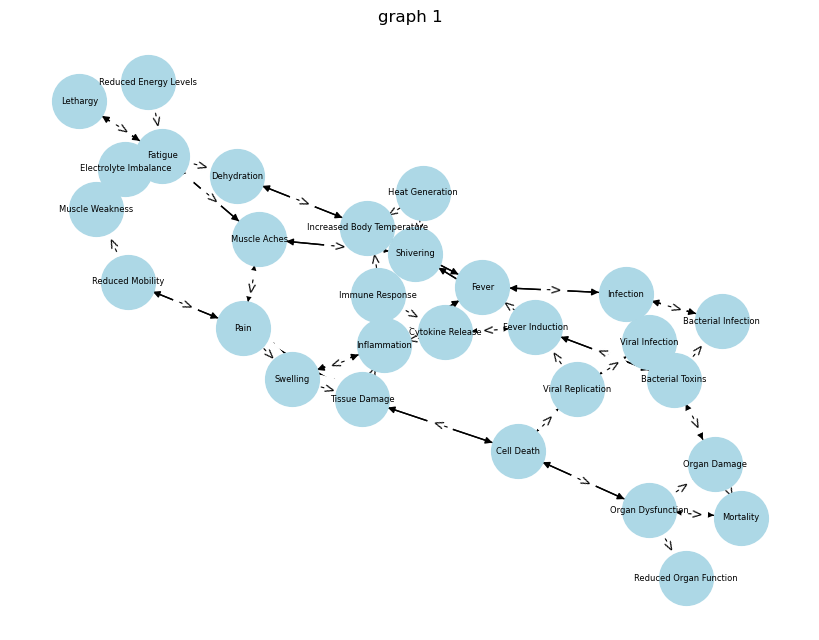

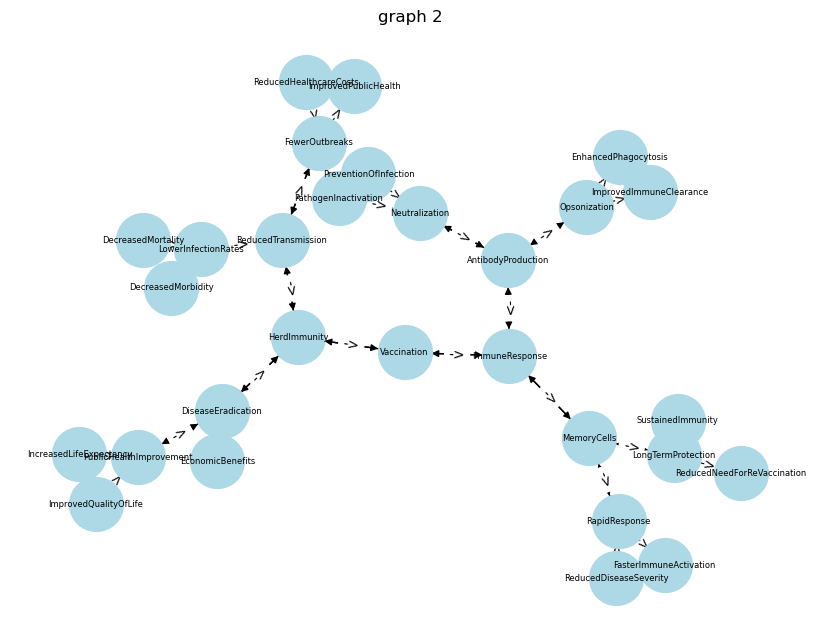

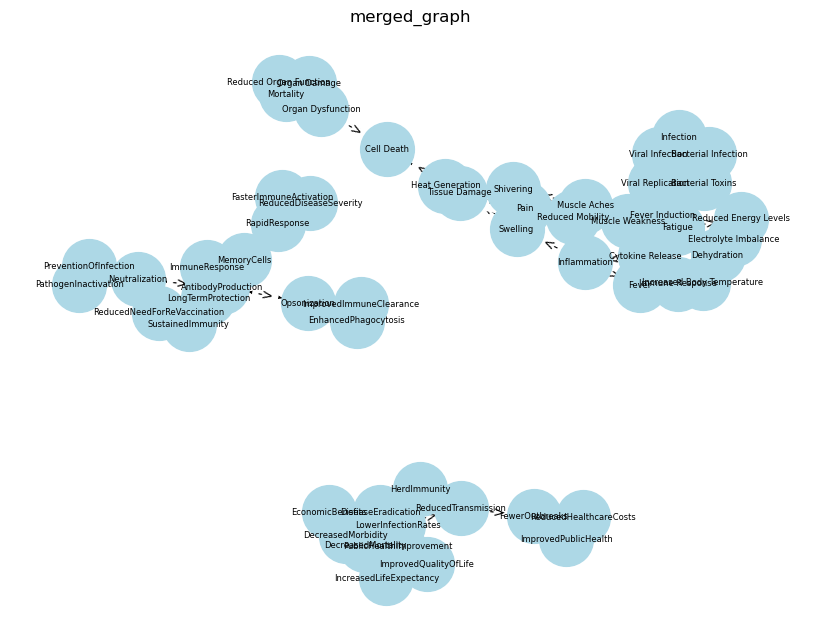

In [3]:
merged_graph = CausalGraph('/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/covid_graph_formatted/Fever.json')
visualize_relationship_graph(merged_graph.graph, 'graph 1')

graph = CausalGraph('/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/covid_graph_formatted/Vaccination.json')
merged_graph.merge(graph)

visualize_relationship_graph(graph.graph, 'graph 2')
visualize_relationship_graph(merged_graph.graph, 'merged_graph')

/var/folders/wh/3cghgs_n2k3dkvwmjxz17vy00000gn/T/ipykernel_15804/3449395336.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


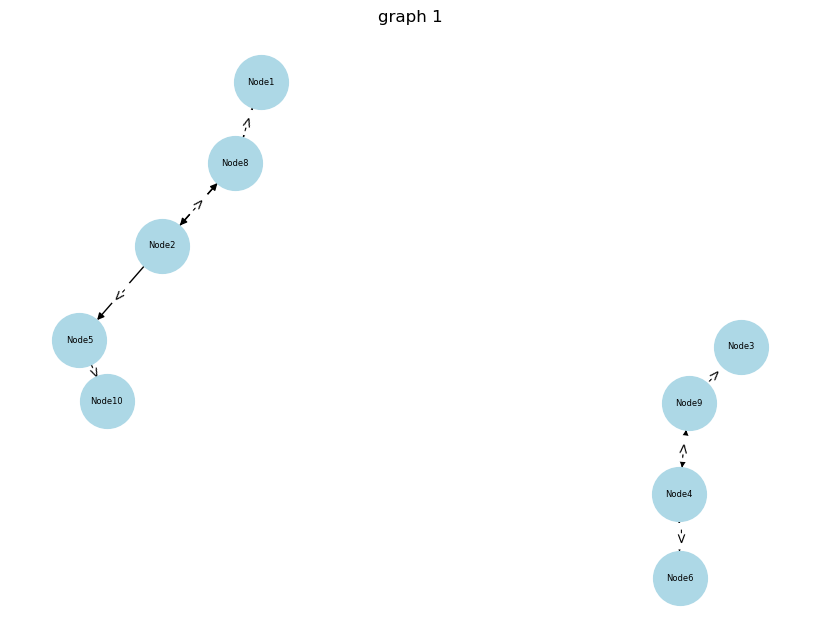

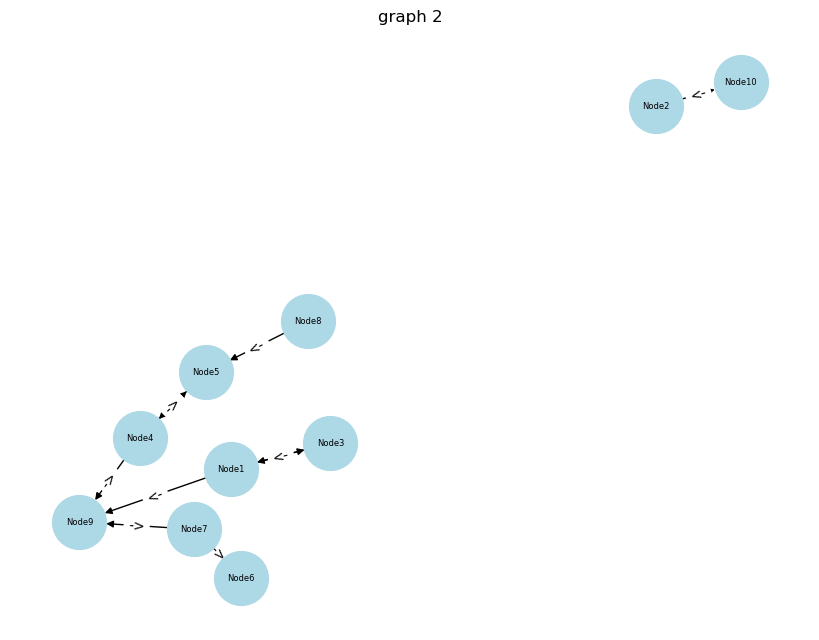

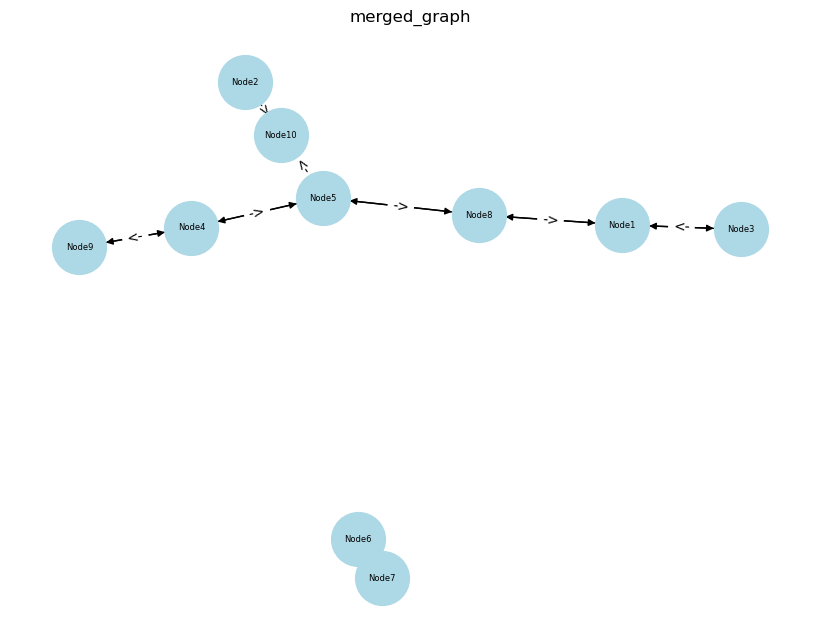

In [49]:
merged_graph = CausalGraph('/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/new_d_g1.json')
visualize_relationship_graph(merged_graph.graph, 'graph 1')

graph = CausalGraph('/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/new_d_g2.json')
merged_graph.merge(graph)

visualize_relationship_graph(graph.graph, 'graph 2')
visualize_relationship_graph(merged_graph.graph, 'merged_graph')

/var/folders/wh/3cghgs_n2k3dkvwmjxz17vy00000gn/T/ipykernel_97554/3449395336.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


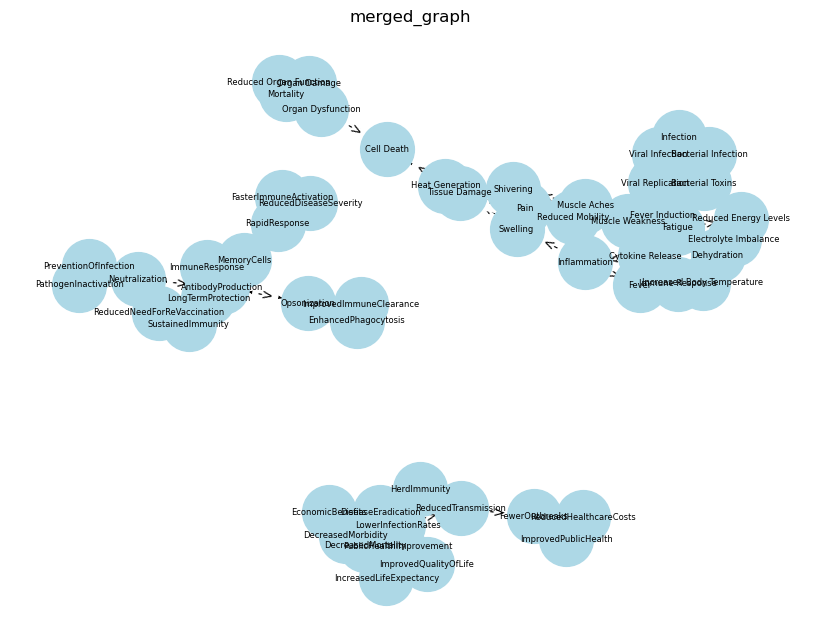

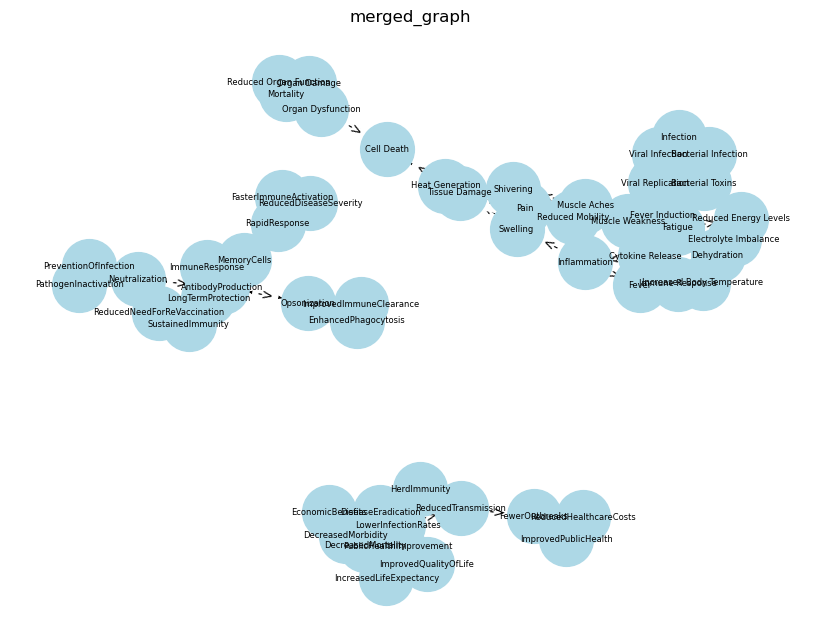

In [4]:
visualize_relationship_graph(merged_graph.graph, 'merged_graph')
visualize_relationship_graph(merged_graph.graph, 'merged_graph')

In [5]:
path = "/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/covid_graph_formatted/"
graphs_list = os.listdir(path)

In [9]:
mgraph = json.load(open(path))

In [11]:
# mgraph

/var/folders/wh/3cghgs_n2k3dkvwmjxz17vy00000gn/T/ipykernel_97554/3449395336.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


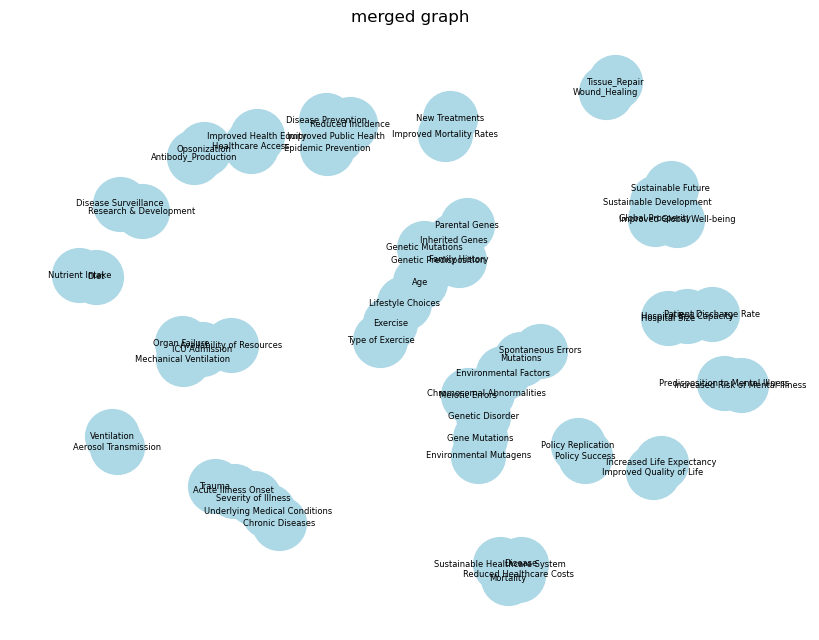

In [8]:
path = '/Users/jerjesaguirrechavez/Desktop/UCSD/repos/graph_merging/data/graphs/covid_graph_formatted/merged_graph.json'
visualize_relationship_graph(json.load(open(path)), 'merged graph')

/var/folders/wh/3cghgs_n2k3dkvwmjxz17vy00000gn/T/ipykernel_15804/3424146994.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


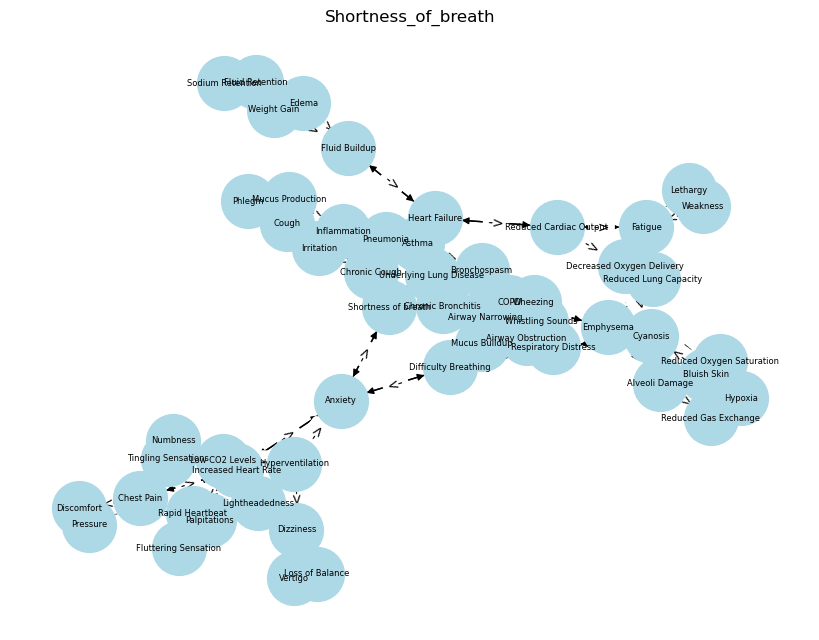

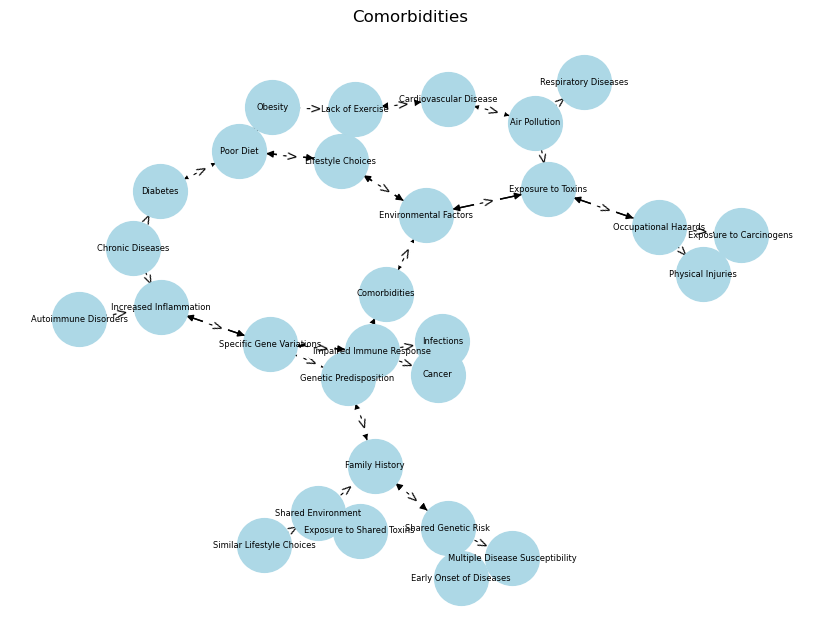

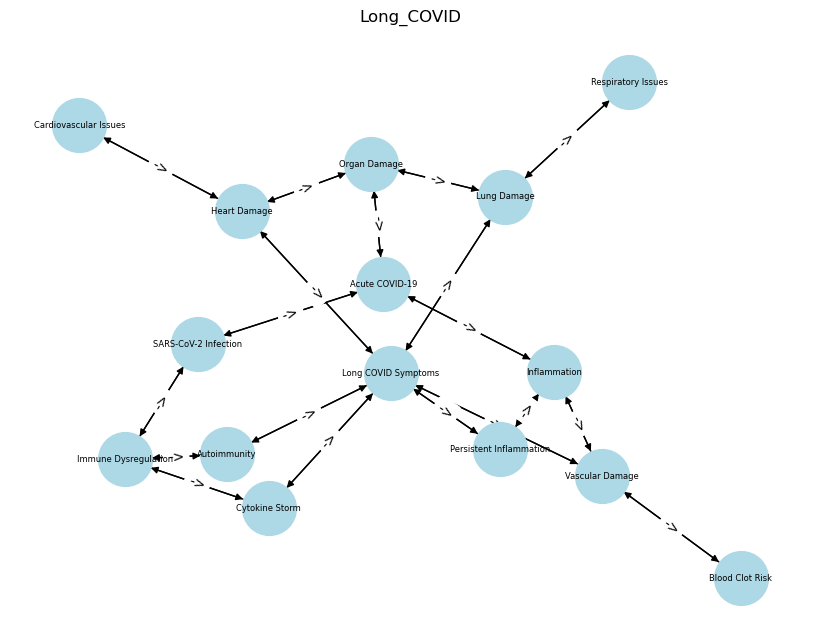

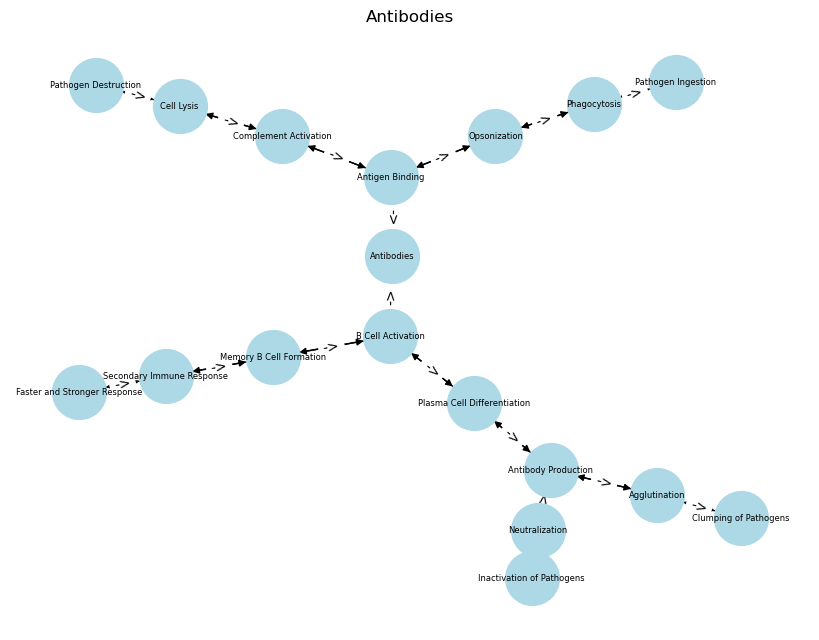

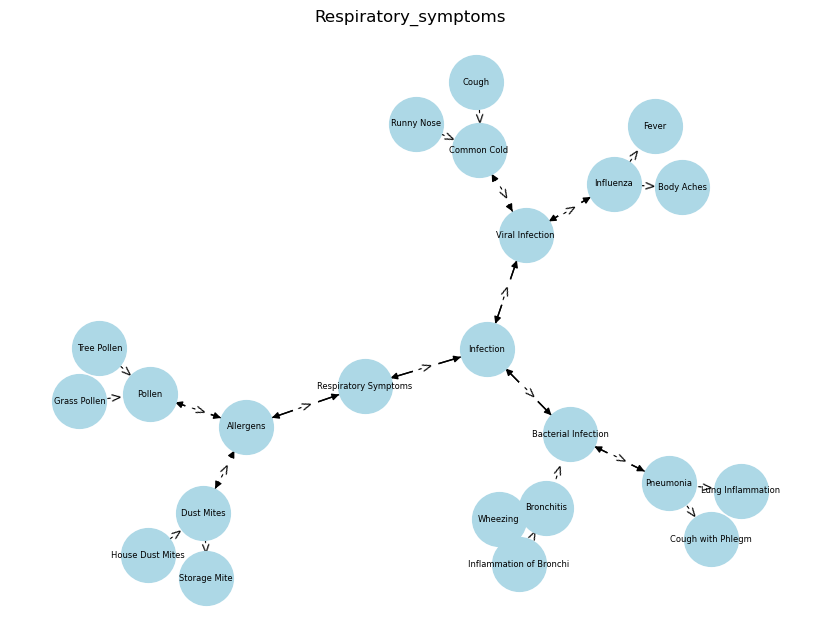

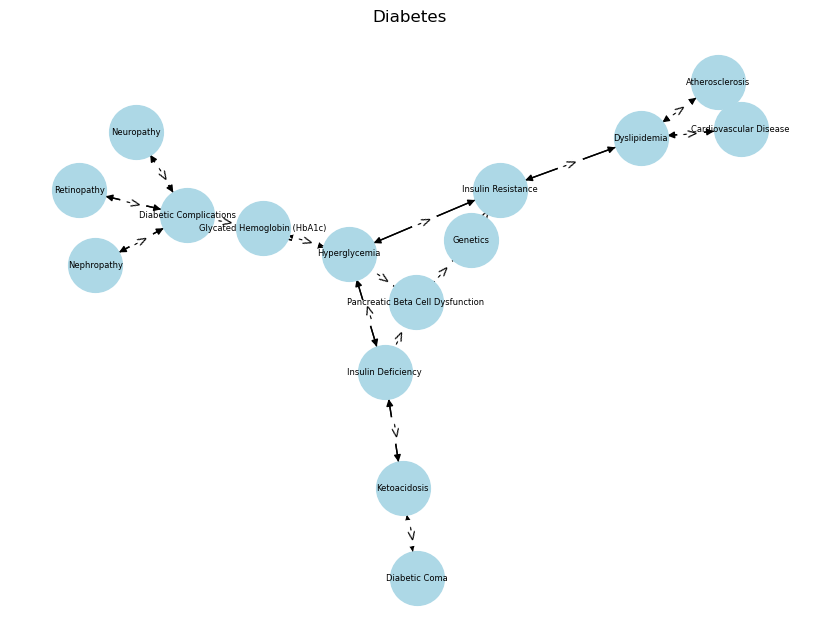

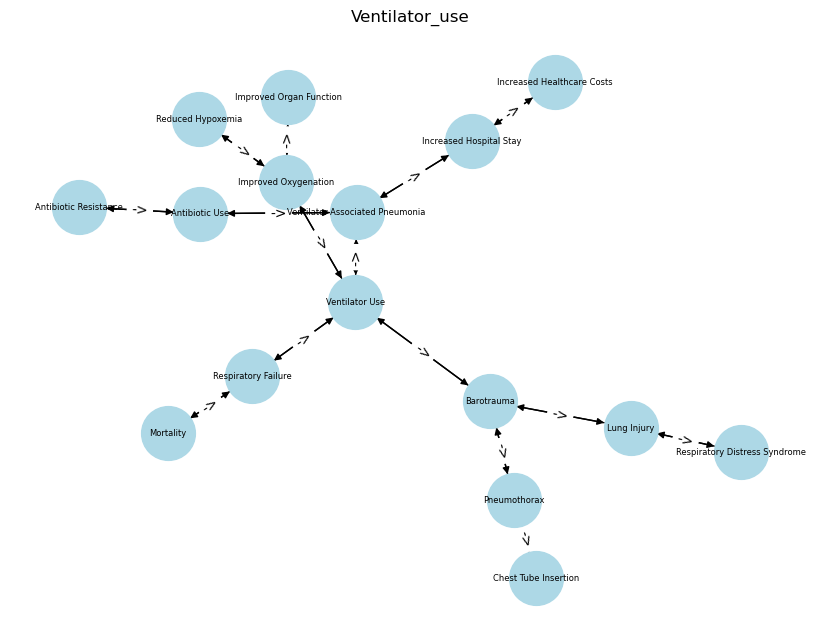

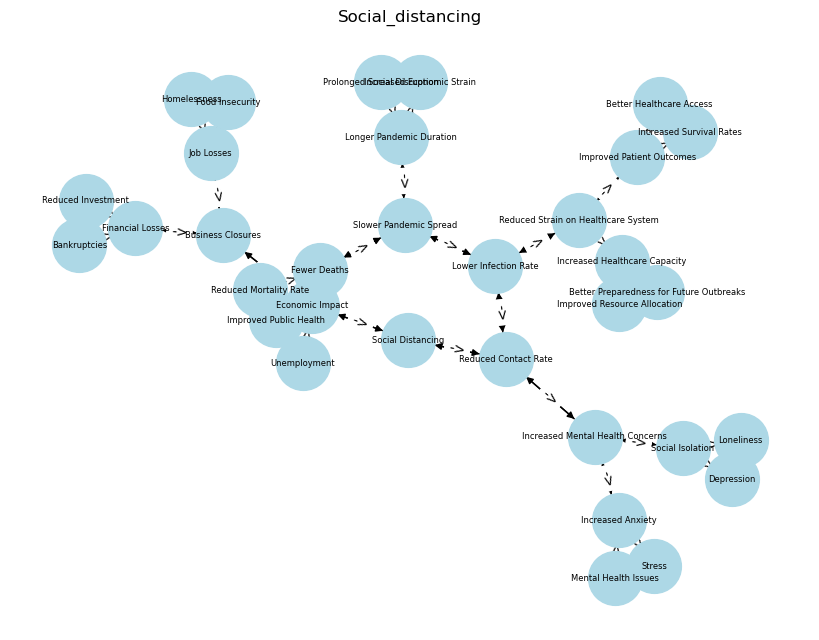

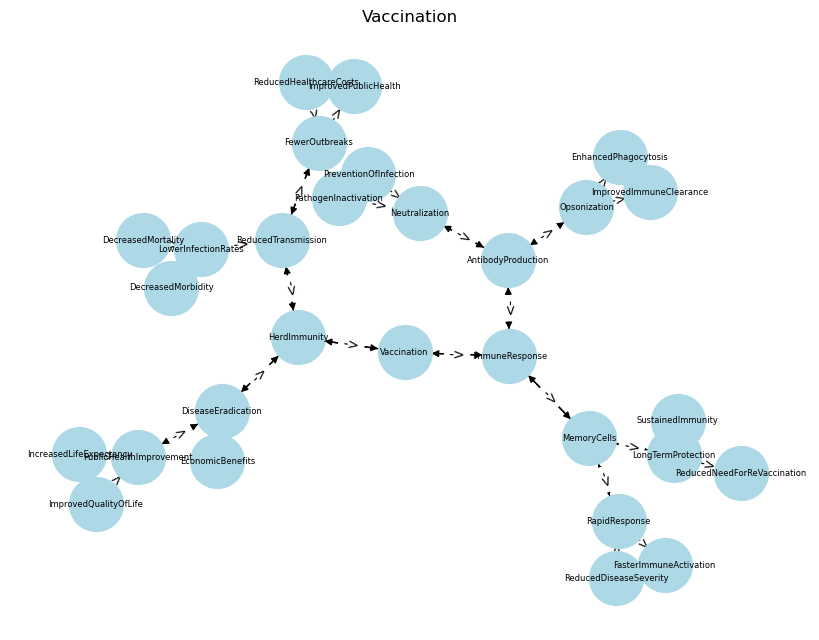

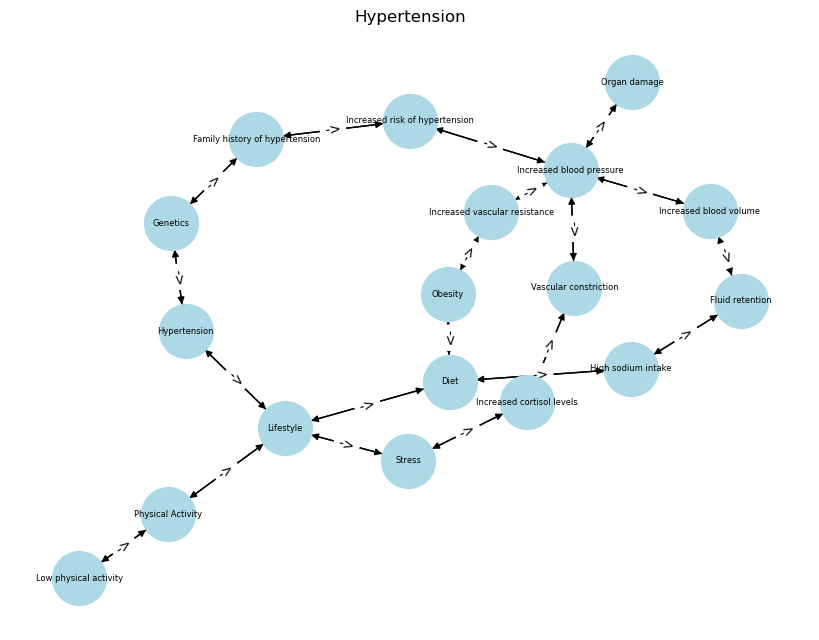

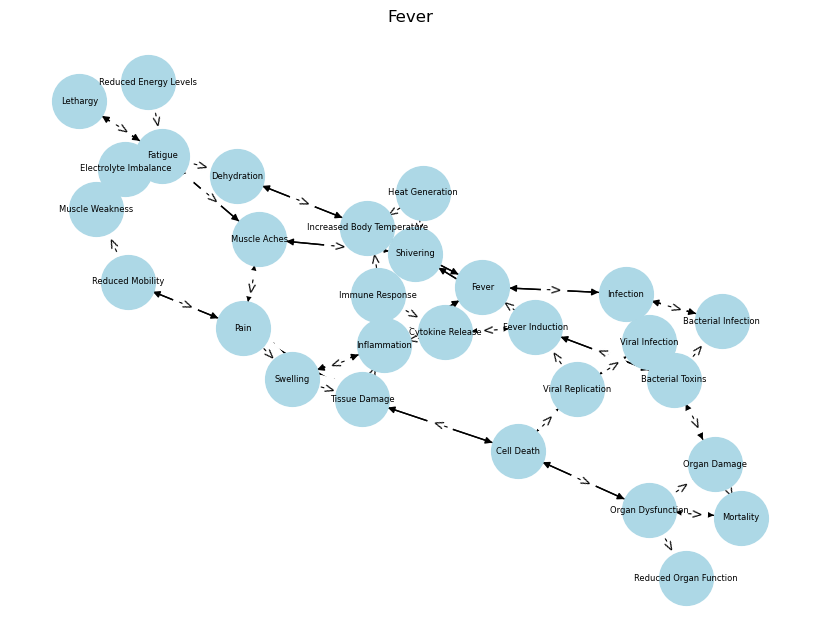

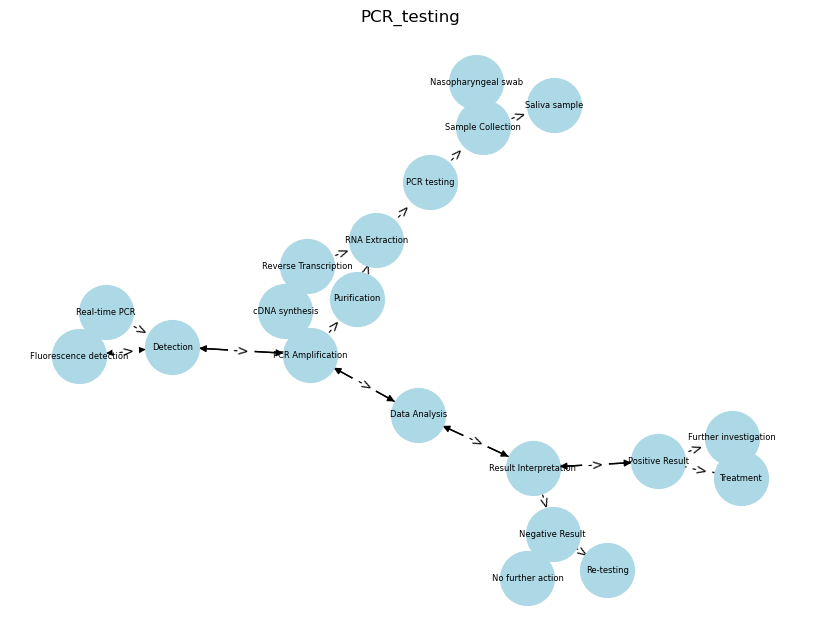

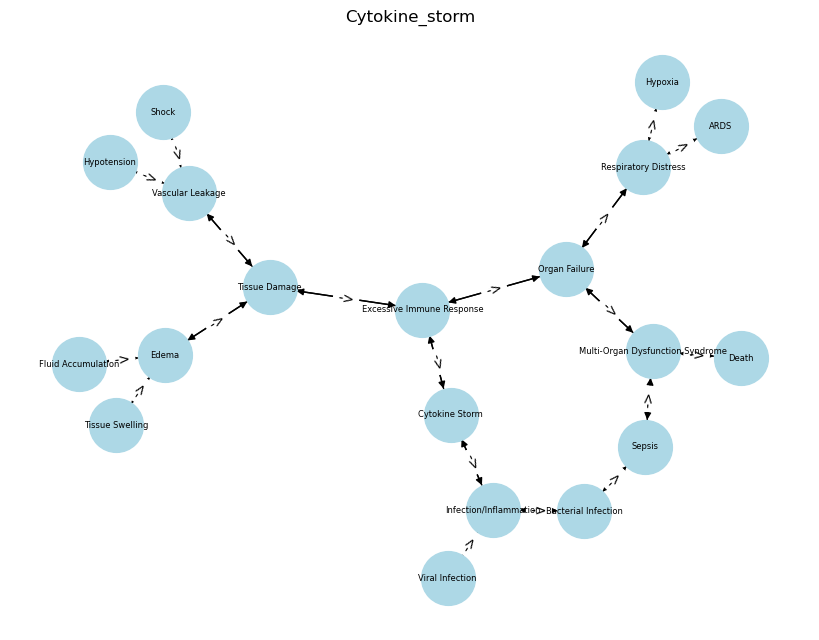

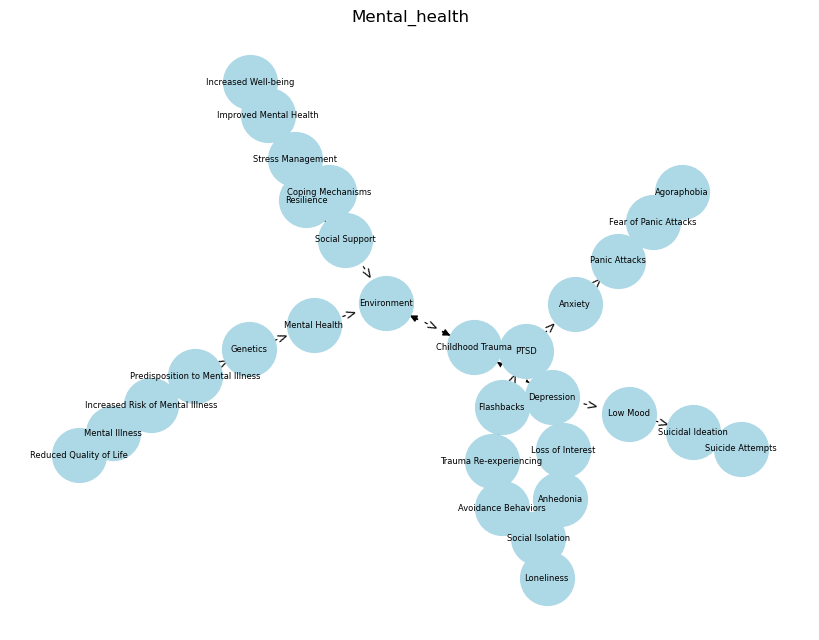

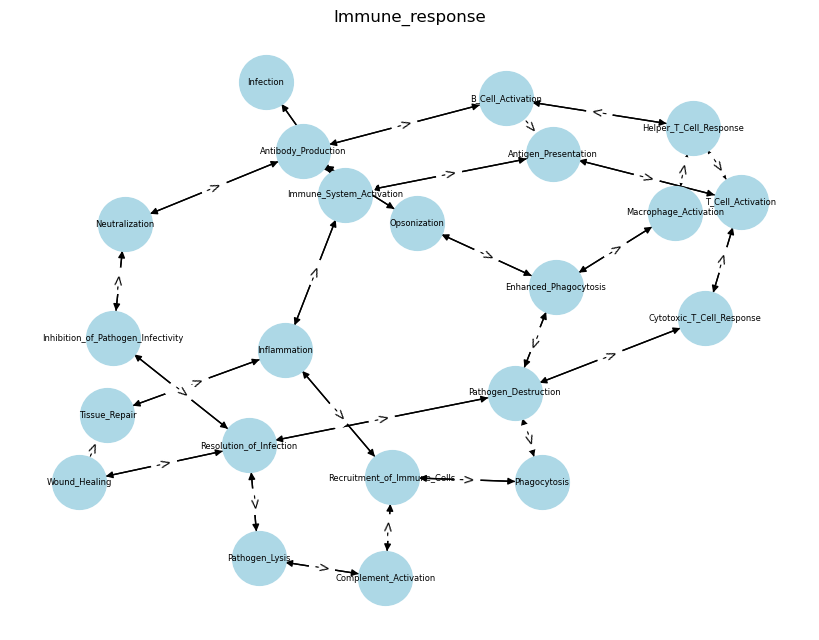

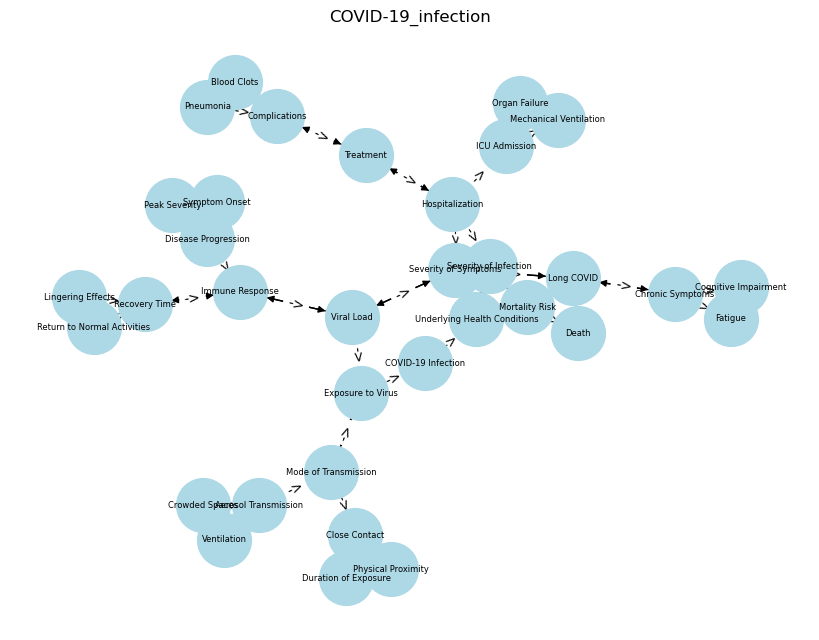

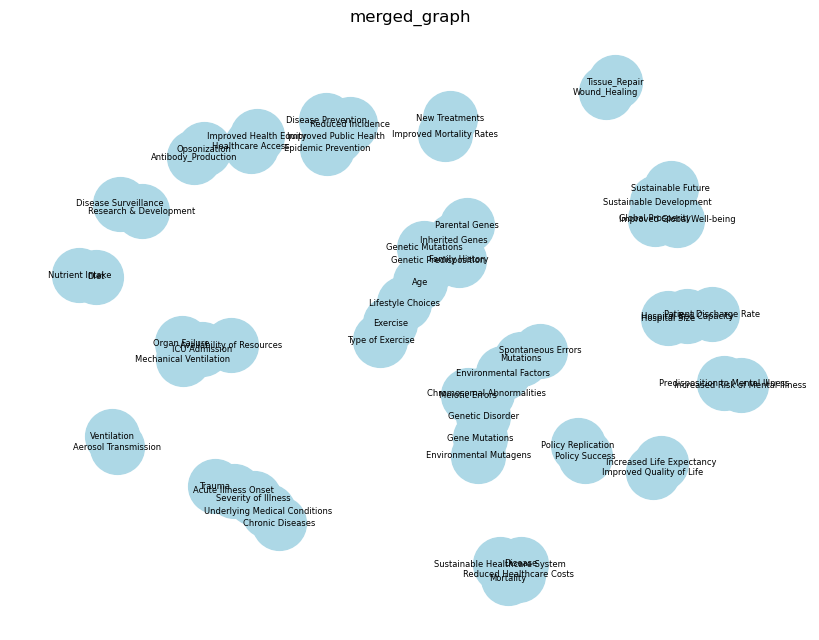

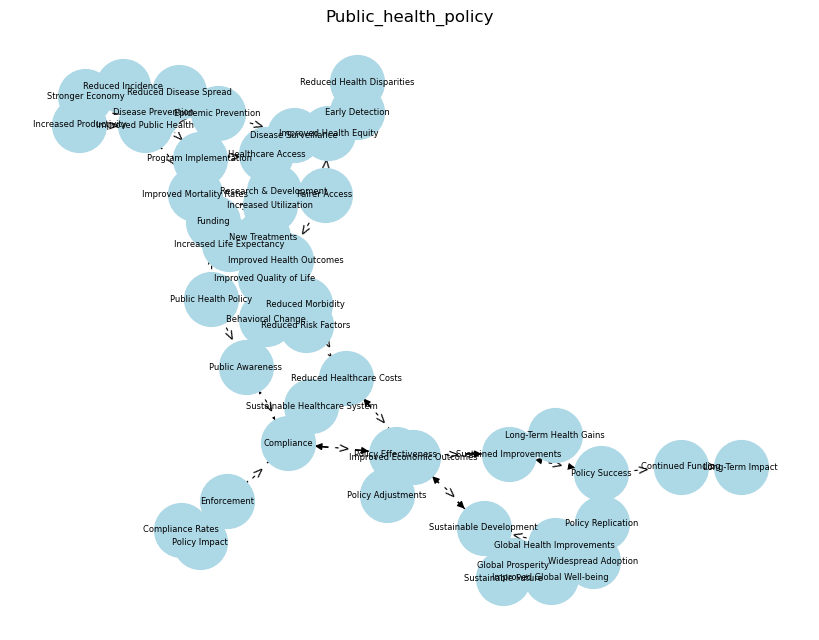

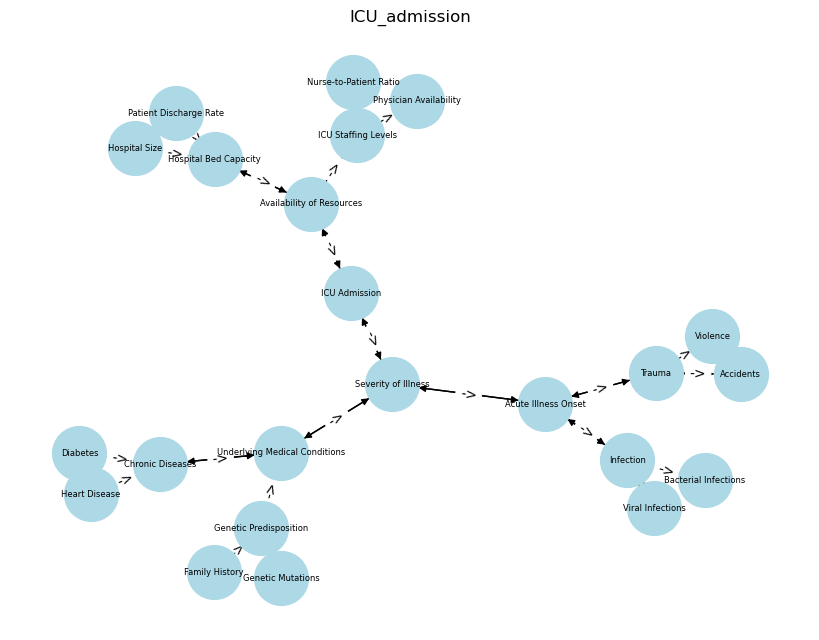

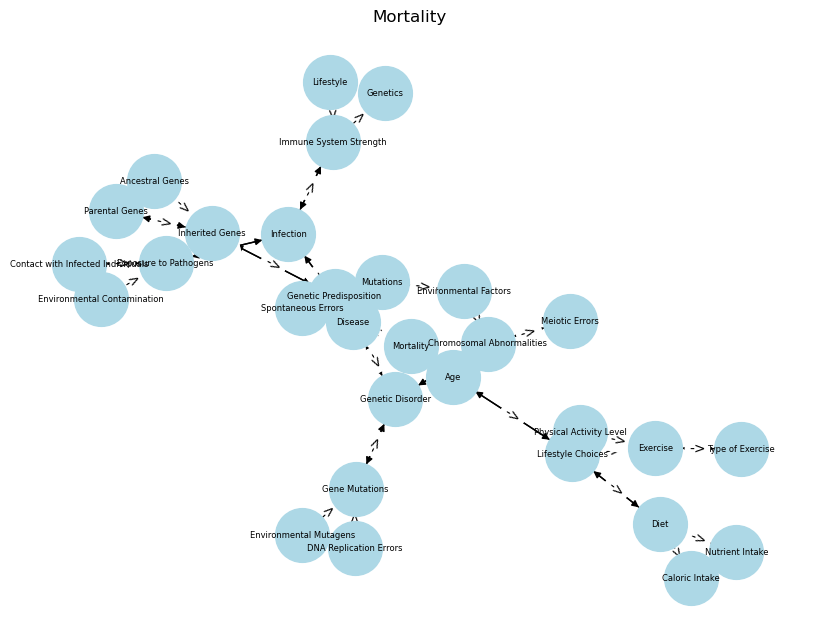

In [32]:
for graph in graphs_list:
    visualize_relationship_graph(json.load(open(path + graph)), graph.split('.')[0])